In [1]:
import numpy as np
import pandas as pd 
import requests
import xlsxwriter
import math
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame 
%matplotlib inline
import pandas_ta as pta

In [2]:
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [3]:
load_dotenv()
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')

In [4]:
base_url = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

account = api.get_account()





# Create the Alpaca API object
# YOUR CODE HERE!
ETH_price = api.get_crypto_bars('ETHUSD',  TimeFrame.Day, "2010-06-08", "2022-08-21")
ETH_df = ETH_price.df

ETH_df.tail()

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2022-08-20 05:00:00+00:00,ERSX,1635.81,1649.62,1527.15,1589.94,303.359683,237,1585.198199
2022-08-20 05:00:00+00:00,FTXU,1648.20,1656.50,1524.20,1583.40,88148.353000,39523,1592.622357
2022-08-21 05:00:00+00:00,CBSE,1583.30,1646.69,1562.27,1607.59,402854.147811,945282,1611.916031
2022-08-21 05:00:00+00:00,ERSX,1580.00,1639.13,1528.00,1606.94,374.913221,155,1608.079824
2022-08-21 05:00:00+00:00,FTXU,1583.40,1646.60,1563.40,1607.80,73192.668000,36672,1610.898730


In [5]:
ETH_df = ETH_df.drop(columns=["open","high","low","volume","trade_count","vwap"])


In [6]:
ETH_df = ETH_df[ETH_df['exchange'].str.contains("ERSX|FTXU")==False]


ETH_df.head()

,exchange,close
timestamp,,
2016-05-17 05:00:00+00:00,CBSE,14.00
2016-05-18 05:00:00+00:00,CBSE,13.18
2016-05-19 05:00:00+00:00,CBSE,14.82
2016-05-20 05:00:00+00:00,CBSE,14.17
2016-05-23 05:00:00+00:00,CBSE,13.74


In [7]:
ETH_df["Actual Returns"] = ETH_df["close"].pct_change()

In [8]:
ETH_df = ETH_df.dropna()

In [9]:
ETH_df

,exchange,close,Actual Returns
timestamp,,,
2016-05-18 05:00:00+00:00,CBSE,13.18,-0.058571
2016-05-19 05:00:00+00:00,CBSE,14.82,0.124431
2016-05-20 05:00:00+00:00,CBSE,14.17,-0.043860
2016-05-23 05:00:00+00:00,CBSE,13.74,-0.030346
2016-05-24 05:00:00+00:00,CBSE,12.94,-0.058224
...,...,...,...
2022-08-17 05:00:00+00:00,CBSE,1844.30,-0.029648
2022-08-18 05:00:00+00:00,CBSE,1818.78,-0.013837
2022-08-19 05:00:00+00:00,CBSE,1647.72,-0.094052


In [13]:
ETH_df["RSI EMA"] = pta.rsi(ETH_df['close'], length = 30)
ETH_df["RSI Drift"] = pta.rsi(ETH_df['close'], length = 30, drift = 10)

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
ETH_df = ETH_df.dropna()

In [15]:
ETH_df    

,exchange,close,Actual Returns,RSI EMA,RSI SMA,RSI Drift
timestamp,,,,,,
2016-08-06 05:00:00+00:00,CBSE,11.07,-0.009839,46.261542,39.644515,44.619524
2016-08-07 05:00:00+00:00,CBSE,10.99,-0.007227,45.954187,38.304243,42.262802
2016-08-08 05:00:00+00:00,CBSE,11.37,0.034577,47.662812,37.240603,40.457497
2016-08-09 05:00:00+00:00,CBSE,12.28,0.080035,51.464086,37.117298,40.251798
2016-08-10 05:00:00+00:00,CBSE,12.17,-0.008958,51.000883,37.457531,40.746773
...,...,...,...,...,...,...
2022-08-17 05:00:00+00:00,CBSE,1844.30,-0.029648,55.616672,73.473892,73.473892
2022-08-18 05:00:00+00:00,CBSE,1818.78,-0.013837,54.827871,73.641888,73.641888
2022-08-19 05:00:00+00:00,CBSE,1647.72,-0.094052,49.918615,73.236627,73.236627


In [16]:
ETH_df["Signal"] = 0.0


ETH_df.loc[(ETH_df["Actual Returns"] >= 0), 'Signal'] = 1
ETH_df.loc[(ETH_df["Actual Returns"] < 0), 'Signal'] = -1

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
ETH_df

,exchange,close,Actual Returns,RSI EMA,RSI SMA,RSI Drift,Signal
timestamp,,,,,,,
2016-08-06 05:00:00+00:00,CBSE,11.07,-0.009839,46.261542,39.644515,44.619524,-1.0
2016-08-07 05:00:00+00:00,CBSE,10.99,-0.007227,45.954187,38.304243,42.262802,-1.0
2016-08-08 05:00:00+00:00,CBSE,11.37,0.034577,47.662812,37.240603,40.457497,1.0
2016-08-09 05:00:00+00:00,CBSE,12.28,0.080035,51.464086,37.117298,40.251798,1.0
2016-08-10 05:00:00+00:00,CBSE,12.17,-0.008958,51.000883,37.457531,40.746773,-1.0
...,...,...,...,...,...,...,...
2022-08-17 05:00:00+00:00,CBSE,1844.30,-0.029648,55.616672,73.473892,73.473892,-1.0
2022-08-18 05:00:00+00:00,CBSE,1818.78,-0.013837,54.827871,73.641888,73.641888,-1.0
2022-08-19 05:00:00+00:00,CBSE,1647.72,-0.094052,49.918615,73.236627,73.236627,-1.0


In [18]:
ETH_df['Strategy Returns'] = ETH_df['Actual Returns'] * ETH_df['Signal'].shift()

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
ETH_df

,exchange,close,Actual Returns,RSI EMA,RSI SMA,RSI Drift,Signal,Strategy Returns
timestamp,,,,,,,,
2016-08-06 05:00:00+00:00,CBSE,11.07,-0.009839,46.261542,39.644515,44.619524,-1.0,NaN
2016-08-07 05:00:00+00:00,CBSE,10.99,-0.007227,45.954187,38.304243,42.262802,-1.0,0.007227
2016-08-08 05:00:00+00:00,CBSE,11.37,0.034577,47.662812,37.240603,40.457497,1.0,-0.034577
2016-08-09 05:00:00+00:00,CBSE,12.28,0.080035,51.464086,37.117298,40.251798,1.0,0.080035
2016-08-10 05:00:00+00:00,CBSE,12.17,-0.008958,51.000883,37.457531,40.746773,-1.0,-0.008958
...,...,...,...,...,...,...,...,...
2022-08-17 05:00:00+00:00,CBSE,1844.30,-0.029648,55.616672,73.473892,73.473892,-1.0,-0.029648
2022-08-18 05:00:00+00:00,CBSE,1818.78,-0.013837,54.827871,73.641888,73.641888,-1.0,0.013837
2022-08-19 05:00:00+00:00,CBSE,1647.72,-0.094052,49.918615,73.236627,73.236627,-1.0,0.094052


<AxesSubplot:xlabel='timestamp'>

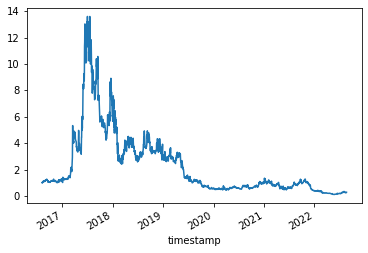

In [21]:
(1 + ETH_df['Strategy Returns']).cumprod().plot()

In [18]:
X = ETH_df[['', '']].shift().dropna()

In [19]:
y = ETH_df['Signal']

In [20]:
training_begin = X.index.min()
print(training_begin)

2016-08-28 05:00:00+00:00


In [21]:
training_end = X.index.min() + DateOffset(months=24)
print(training_end)

2018-08-28 05:00:00+00:00


In [22]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]


In [23]:
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

In [24]:
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from sklearn import svm

In [26]:
svm_model =svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:10]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
svm_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.15      0.24       352
         1.0       0.53      0.87      0.66       379

    accuracy                           0.53       731
   macro avg       0.53      0.51      0.45       731
weighted avg       0.53      0.53      0.46       731



In [28]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [29]:
 # Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.41      0.45       711
         1.0       0.52      0.60      0.56       743

    accuracy                           0.51      1454
   macro avg       0.51      0.51      0.50      1454
weighted avg       0.51      0.51      0.51      1454



In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bc_model = BaggingClassifier()
 
# Fit the model to the data using the training data
bc_model = bc_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
bc_pred = bc_model.predict(X_train_scaled)

# Review the model's predicted values
bc_pred[:10]

array([-1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.])

In [32]:
bc_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(bc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.15      0.24       352
         1.0       0.53      0.87      0.66       379

    accuracy                           0.53       731
   macro avg       0.53      0.51      0.45       731
weighted avg       0.53      0.53      0.46       731



In [33]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = bc_model.predict(X_test_scaled)

In [34]:
 # Evaluate the model's ability to predict the trading signal for the testing data
bc_testing_report = classification_report(y_test, testing_signal_predictions)
print(bc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.48      0.59      0.53       711
         1.0       0.50      0.40      0.44       743

    accuracy                           0.49      1454
   macro avg       0.49      0.49      0.49      1454
weighted avg       0.49      0.49      0.49      1454



In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ABC_model = AdaBoostClassifier()
 
# Fit the model to the data using the training data
ABC_model = ABC_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
ABC_pred = ABC_model.predict(X_train_scaled)

# Review the model's predicted values
ABC_pred[:10]


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [37]:
ABC_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(ABC_testing_report)

              precision    recall  f1-score   support

        -1.0       0.53      0.15      0.24       352
         1.0       0.53      0.87      0.66       379

    accuracy                           0.53       731
   macro avg       0.53      0.51      0.45       731
weighted avg       0.53      0.53      0.46       731



In [38]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = ABC_model.predict(X_test_scaled)

In [39]:
 # Evaluate the model's ability to predict the trading signal for the testing data
ABC_testing_report = classification_report(y_test, testing_signal_predictions)
print(ABC_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.41      0.45       711
         1.0       0.52      0.60      0.56       743

    accuracy                           0.51      1454
   macro avg       0.51      0.51      0.50      1454
weighted avg       0.51      0.51      0.51      1454

